In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data = {'Student_ID':[1,2,3,4,5,6,7,8],
        'Name':['Mohit','Saras','Smit','Rushi','Shreyy','Amit','Sarthak','Daggy'],
        'Age':[20,17,None,18,25,60,9,23],
        'Grade':[60,70,80,83,None,77,65,None],
        'Attendance':[99,95,65,60,10,75,69,45]
}

In [95]:
df=pd.DataFrame(data)

In [96]:
df

,Student_ID,Name,Age,Grade,Attendance
0,1,Mohit,20.0,60.0,99
1,2,Saras,17.0,70.0,95
2,3,Smit,NaN,80.0,65
3,4,Rushi,18.0,83.0,60
4,5,Shreyy,25.0,NaN,10
5,6,Amit,60.0,77.0,75
6,7,Sarthak,9.0,65.0,69
7,8,Daggy,23.0,NaN,45


In [97]:
df.head(9)

,Student_ID,Name,Age,Grade,Attendance
0,1,Mohit,20.0,60.0,99
1,2,Saras,17.0,70.0,95
2,3,Smit,NaN,80.0,65
3,4,Rushi,18.0,83.0,60
4,5,Shreyy,25.0,NaN,10
5,6,Amit,60.0,77.0,75
6,7,Sarthak,9.0,65.0,69
7,8,Daggy,23.0,NaN,45


In [98]:
miss_val = df.isnull().sum()

In [99]:
miss_val

Student_ID    0
Name          0
Age           1
Grade         2
Attendance    0
dtype: int64

In [100]:
df['Grade'].fillna(df['Grade'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(),inplace=True)

In [101]:
df

,Student_ID,Name,Age,Grade,Attendance
0,1,Mohit,20.0,60.0,99
1,2,Saras,17.0,70.0,95
2,3,Smit,20.0,80.0,65
3,4,Rushi,18.0,83.0,60
4,5,Shreyy,25.0,73.5,10
5,6,Amit,60.0,77.0,75
6,7,Sarthak,9.0,65.0,69
7,8,Daggy,23.0,73.5,45


In [102]:
insconsistance_age = df[(df['Age']< 10) | (df['Age']>20)]

In [103]:
insconsistance_age

,Student_ID,Name,Age,Grade,Attendance
4,5,Shreyy,25.0,73.5,10
5,6,Amit,60.0,77.0,75
6,7,Sarthak,9.0,65.0,69
7,8,Daggy,23.0,73.5,45


{'whiskers': [<matplotlib.lines.Line2D at 0x20fec86eee0>,
 'caps': [<matplotlib.lines.Line2D at 0x20fece1c6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fec86e520>],
 'medians': [<matplotlib.lines.Line2D at 0x20fece1c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fece1c6a0>],
 'means': []}

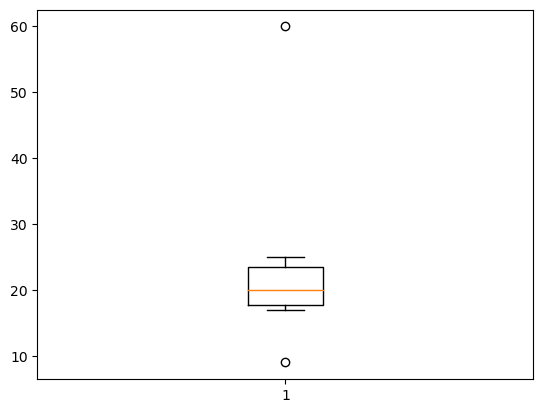

In [104]:
plt.boxplot(x='Age',data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x20fec7a1fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x20fec58aeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fec58d7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x20fec58ad00>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fec766df0>],
 'means': []}

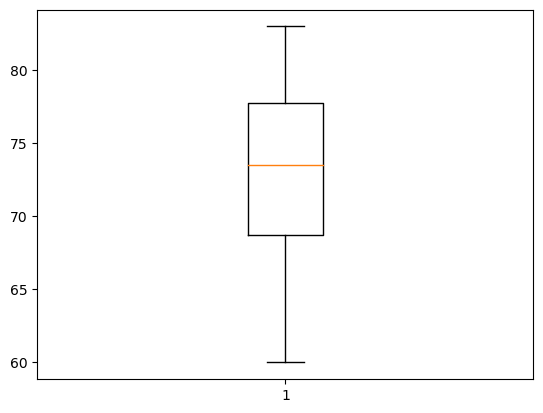

In [105]:
plt.boxplot(x='Grade',data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x20fec6f1400>,
 'caps': [<matplotlib.lines.Line2D at 0x20fec6f1b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x20fec6f1a90>],
 'medians': [<matplotlib.lines.Line2D at 0x20fec6aef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x20fec6aeac0>],
 'means': []}

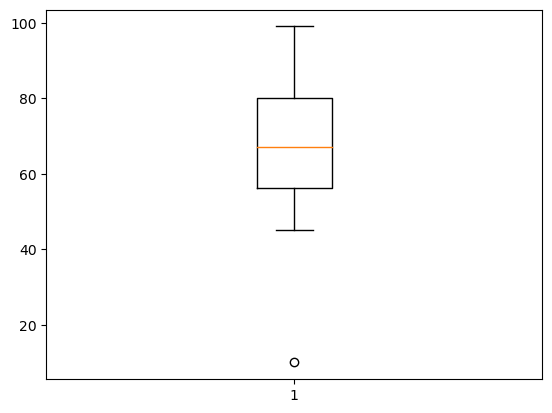

In [106]:
plt.boxplot(x='Attendance',data=df)

In [107]:
def Remove_outliers(column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    Lower_bound=Q1 - 1.5*IQR
    Upper_bound=Q3 + 1.5*IQR
    return column[(column>=Lower_bound)&(column<=Upper_bound)]
    

In [108]:
df['Age']=Remove_outliers(df['Age'])

In [109]:
df['Age']

0    20.0
1    17.0
2    20.0
3    18.0
4    25.0
5     NaN
6     NaN
7    23.0
Name: Age, dtype: float64

In [110]:
df['Attendance']=Remove_outliers(df['Attendance'])

In [111]:
df['Attendance']

0    99.0
1    95.0
2    65.0
3    60.0
4     NaN
5    75.0
6    69.0
7    45.0
Name: Attendance, dtype: float64

In [112]:
df['Grade']=Remove_outliers(df['Grade'])

In [113]:
df['Grade']

0    60.0
1    70.0
2    80.0
3    83.0
4    73.5
5    77.0
6    65.0
7    73.5
Name: Grade, dtype: float64

In [114]:
df['Age_sqrt']=np.sqrt(df['Age'])

In [115]:
df['Age_sqrt']

0    4.472136
1    4.123106
2    4.472136
3    4.242641
4    5.000000
5         NaN
6         NaN
7    4.795832
Name: Age_sqrt, dtype: float64